In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
file = 'breast_cancer.csv'
data = pd.read_csv(file)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# Removed the two unwanted columns, ID and Unnamed: 32

data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)
data_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Convert 'diagnosis' to a numerical variable
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# Define the features and the target
X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']

# Split the dataset into training and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Number of train data: {len(X_train)}\nNumber of test data: {len(X_test)}")

Number of train data: 455
Number of test data: 114


# Decision Tree Classifier

**Parameters in test:**


* **Criterion** *(Gini/Entropy/Log Loss)*: The function that measures the quality of a split

* **max_depth**: A limit to the tree depth, meaning the longest path of nodes in a tree. Default value is None, so there is no limit

* **min_samples_leaf**: The minimum number of samples a leaf must have; The default value of 1 means that the algorithm can split any node, but if we set the value to 5, a node can't be split if it produces at least a life of < 5 samples



In [98]:
# Create a list for the three parameters that will be used for testing
criterion = ["gini", "entropy", "log_loss"]
max_depth = [None, 3, 5]
min_samples_leaf = [1, 5, 10]

# The list to store the results
results = []

# Iterate over all possible combinations of parameters
for crit in criterion:
    for depth in max_depth:
        for min_samples in min_samples_leaf:
            # Create and train the classifier
            classifier = DecisionTreeClassifier(criterion=crit,
                                            max_depth=depth,
                                            min_samples_leaf=min_samples,
                                            random_state=0)
            classifier.fit(X_train, y_train)

            # Make the predictions fpr the test set
            y_pred = classifier.predict(X_test)

            # Calculate the accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Add the results to the list
            results.append({
                'criterion': crit,
                'max_depth': depth,
                'min_samples_leaf': min_samples,
                'accuracy': accuracy
            })

# Create the results dataframe from the results list
decision_tree_accuracy_scores = pd.DataFrame(results)
decision_tree_accuracy_scores.head()

,criterion,max_depth,min_samples_leaf,accuracy
0,gini,NaN,1,0.912281
1,gini,NaN,5,0.947368
2,gini,NaN,10,0.964912
3,gini,3.0,1,0.964912
4,gini,3.0,5,0.973684


## Question 2

In [100]:
#Select the Decision Tree classifier with the best accuracy
decision_tree_best_combination = decision_tree_accuracy_scores.loc[decision_tree_accuracy_scores['accuracy'].idxmax()]

decision_tree_best_combination

criterion               gini
max_depth                3.0
min_samples_leaf           5
accuracy            0.973684
Name: 4, dtype: object

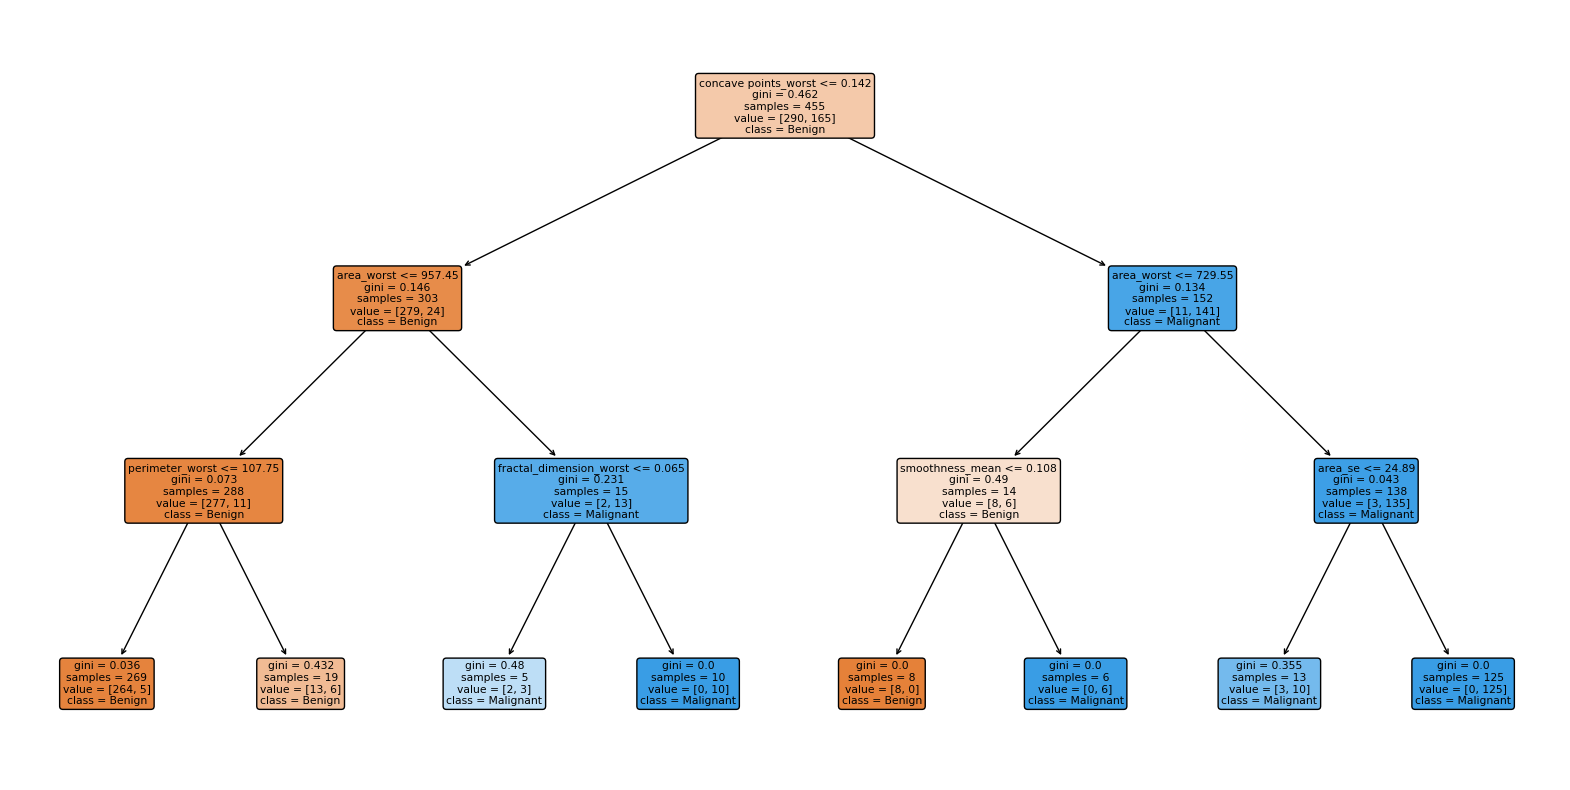

In [101]:
# Create the Decision Tree classifier with the best parameters
best_decision_treeclassifier = DecisionTreeClassifier(criterion=decision_tree_best_combination['criterion'],
                                     max_depth=int(decision_tree_best_combination['max_depth']),
                                     min_samples_leaf=decision_tree_best_combination['min_samples_leaf'],
                                     random_state=0)

# Train the classifier
best_decision_treeclassifier.fit(X_train, y_train)

# Plot the best Decision Tree
plt.figure(figsize=(20,10))
tree_plot = plot_tree(best_decision_treeclassifier,
                      filled=True,
                      rounded=True,
                      class_names=['Benign', 'Malignant'],
                      feature_names=X.columns)

plt.show()

In [102]:
decision_tree_accuracy_scores['parameters'] = (decision_tree_accuracy_scores['criterion'] + " / " +
                            decision_tree_accuracy_scores['max_depth'].astype(str) + " / " +
                            decision_tree_accuracy_scores['min_samples_leaf'].astype(str))

decision_tree_accuracy_scores.sort_values(by='accuracy', inplace=True)

decision_tree_accuracy_scores.head()

,criterion,max_depth,min_samples_leaf,accuracy,parameters
0,gini,NaN,1,0.912281,gini / nan / 1
24,log_loss,5.0,1,0.921053,log_loss / 5.0 / 1
15,entropy,5.0,1,0.921053,entropy / 5.0 / 1
18,log_loss,NaN,1,0.929825,log_loss / nan / 1
9,entropy,NaN,1,0.929825,entropy / nan / 1


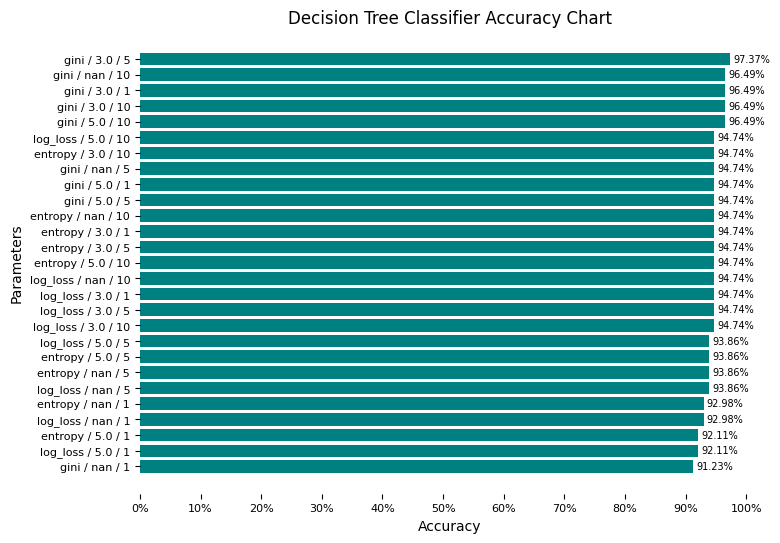

In [142]:
# Plotting the accuracy scores using matplotlib
# This was mistakenly created after misreading the instructions but I kept it since I already did it

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(decision_tree_accuracy_scores['parameters'], decision_tree_accuracy_scores['accuracy'], color='teal')

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.005  # move the text to the right side of the bar, adjust spacing as needed
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2%}', va='center', fontsize=7)

ax.set_xticks([i/100 for i in range(0, 101, 10)])
ax.set_xticklabels([f'{i}%' for i in range(0, 101, 10)], fontsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Parameters')
ax.set_title('Decision Tree Classifier Accuracy Chart')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

Gini seems to be the most consistent parameter as it produced the top 5 accuracies

# Random Forest Classifier

**Parameters in test:**


* **Criterion** *(Gini/Entropy/Log Loss)*: The function that measures the quality of a split

* **n_estimators**: The total number of decision trees in the forest

* **min_samples_split**: The minimum number of samples a node must have to consider a further split; The default value of 2 means that only when a node has 2 samples will the algorithm stop assising it for splitting



In [95]:
# Create a list for the three parameters that will be used for testing
criterion = ["gini", "entropy", "log_loss"]
n_estimators = [50, 100, 200]
min_samples_split = [2, 5, 10]

# The list to store the results
results = []

# Iterate over all possible combinations of parameters
for crit in criterion:
    for estimator in n_estimators:
        for min_samples in min_samples_split:
            # Create and train the classifier
            classifier = RandomForestClassifier(criterion=crit,
                                            n_estimators=depth,
                                            min_samples_split=min_samples,
                                            random_state=0)
            classifier.fit(X_train, y_train)

            # Make the predictions fpr the test set
            y_pred = classifier.predict(X_test)

            # Calculate the accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Add the results to the list
            results.append({
                'criterion': crit,
                'n_estimators': estimator,
                'min_samples_split': min_samples,
                'accuracy': accuracy
            })

# Create the results dataframe from the results list
random_forest_accuracy_scores = pd.DataFrame(results)
random_forest_accuracy_scores.head()

,criterion,n_estimators,min_samples_split,accuracy
0,gini,50,2,0.947368
1,gini,50,5,0.956140
2,gini,50,10,0.938596
3,gini,100,2,0.947368
4,gini,100,5,0.956140


In [96]:
random_forest_accuracy_scores['parameters'] = (random_forest_accuracy_scores['criterion'] + " / " +
                            random_forest_accuracy_scores['n_estimators'].astype(str) + " / " +
                            random_forest_accuracy_scores['min_samples_split'].astype(str))

random_forest_accuracy_scores.sort_values(by='accuracy', inplace=True)

random_forest_accuracy_scores.head()

,criterion,n_estimators,min_samples_split,accuracy,parameters
24,log_loss,200,2,0.921053,log_loss / 200 / 2
21,log_loss,100,2,0.921053,log_loss / 100 / 2
9,entropy,50,2,0.921053,entropy / 50 / 2
18,log_loss,50,2,0.921053,log_loss / 50 / 2
12,entropy,100,2,0.921053,entropy / 100 / 2


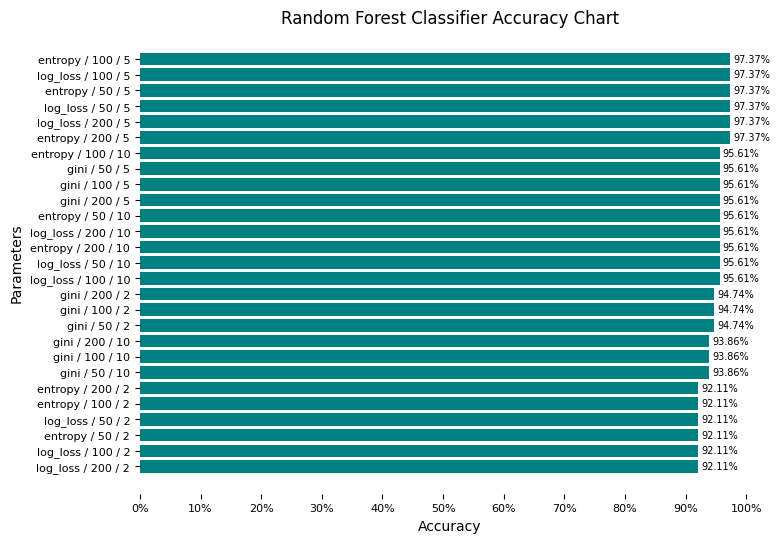

In [141]:
# Plotting the accuracy scores using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(random_forest_accuracy_scores['parameters'], random_forest_accuracy_scores['accuracy'], color='teal')

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.005  # move the text to the right side of the bar, adjust spacing as needed
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2%}', va='center', fontsize=7)

ax.set_xticks([i/100 for i in range(0, 101, 10)])
ax.set_xticklabels([f'{i}%' for i in range(0, 101, 10)], fontsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Parameters')
ax.set_title('Random Forest Classifier Accuracy Chart')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

Looks like a lot of classifiers reached an upper limit of 97.37% accuracy. In comparison with Decision Tree where only one combination of parameters reached the accuracy, with Random Forest, 6 occasions had the maximum accuracy

# Question 5

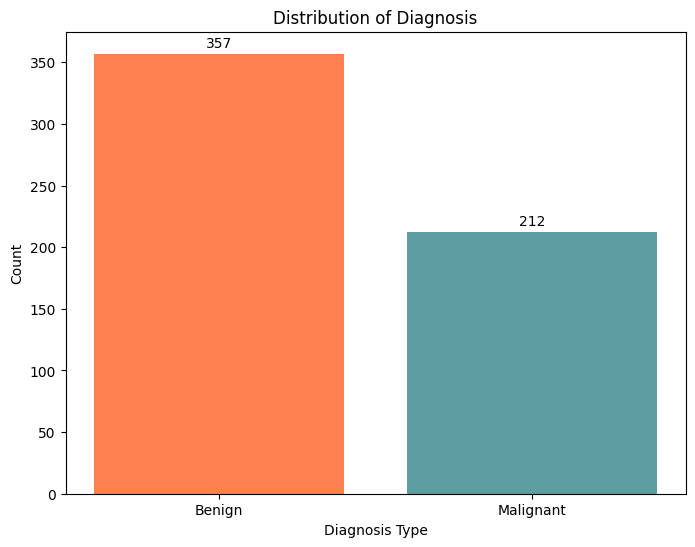

In [110]:
diagnosis_counts = data['diagnosis'].value_counts()
diagnosis_labels = ['Malignant' if x == 'M' else 'Benign' for x in diagnosis_counts.index]


plt.figure(figsize=(8, 6))
bars = plt.bar(diagnosis_labels, diagnosis_counts.values, color=['coral', 'cadetblue'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, yval, ha='center', va='bottom')

plt.show()

* Benign samples are almost double than Malignant samples. This could indicate that Benign is most common or the data collection is not accurate or representative.

*   In case we want to create a classifier that always predicts Malignant, the accuracy would be equal to (Count of Malignant Sampled /Total Samples) 37.26%

* Given the accuracy scores, the models seems to have good results for the given task. For real world scenarions neither the number of data is enough not the features are in high variability

# Question 6

In [150]:
total_accuracy_scores = random_forest_accuracy_scores[['parameters','accuracy']].append(decision_tree_accuracy_scores[['parameters','accuracy']])

total_accuracy_scores['rank'] = total_accuracy_scores['accuracy'].rank(method='first', ascending=False)

# Display the updated DataFrame with the 'Rank' column
total_accuracy_scores.sort_values(by='rank', inplace=True)  # Sort by rank for better readability
total_accuracy_scores.reset_index(drop=True, inplace=True)
total_accuracy_scores.head(8)


<ipython-input-150-9e6c5c65c5ca>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_accuracy_scores = random_forest_accuracy_scores[['parameters','accuracy']].append(decision_tree_accuracy_scores[['parameters','accuracy']])


,parameters,accuracy,rank
0,entropy / 200 / 5,0.973684,1.0
1,log_loss / 200 / 5,0.973684,2.0
2,log_loss / 50 / 5,0.973684,3.0
3,entropy / 50 / 5,0.973684,4.0
4,log_loss / 100 / 5,0.973684,5.0
5,entropy / 100 / 5,0.973684,6.0
6,gini / 3.0 / 5,0.973684,7.0
7,gini / 5.0 / 10,0.964912,8.0


<ipython-input-151-86ebc1e95257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_accuracy_scores_top8['accuracy'] = total_accuracy_scores_top8['accuracy'].apply(lambda x: f"{x:.2%}")


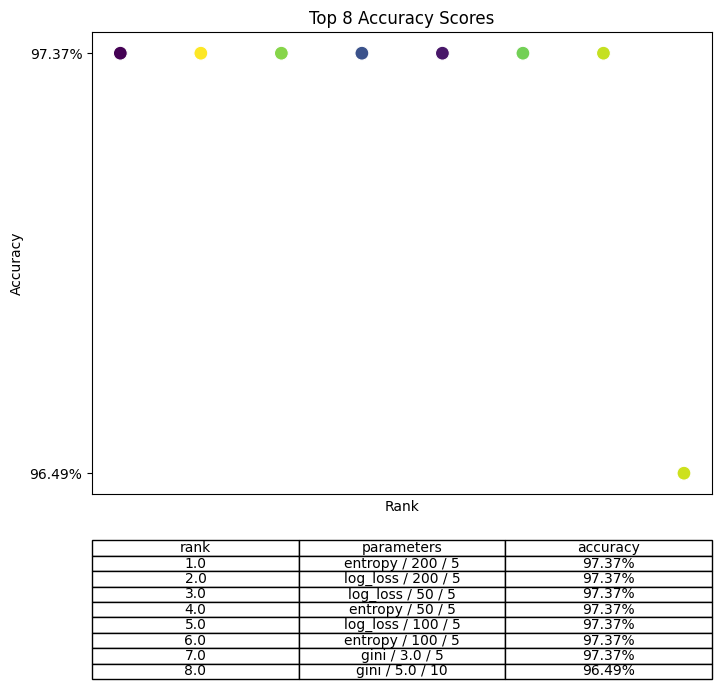

In [151]:
total_accuracy_scores_top8 = total_accuracy_scores.head(8)
total_accuracy_scores_top8['accuracy'] = total_accuracy_scores_top8['accuracy'].apply(lambda x: f"{x:.2%}")

colors = np.random.rand(len(total_accuracy_scores_top8))

plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=total_accuracy_scores_top8, x='rank', y='accuracy', s=100, c=colors)

# Adding plot title and labels
plt.title('Top 8 Accuracy Scores')
plt.xlabel('Rank')
plt.ylabel('Accuracy')
plt.xticks(total_accuracy_scores_top8['rank'])  # Set x-ticks to be the rank numbers

# Adjust layout to make room for the table below the scatter plot
# plt.subplots_adjust(left=0.2, bottom=0.1)
plt.xticks([])  # Hide x-axis ticks

# Create a table to display below the scatter plot
table_data = total_accuracy_scores_top8[['rank', 'parameters', 'accuracy']]
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc = 'center', colLoc = 'center',
                  loc='bottom', bbox=[0, -0.4, 1, 0.3])  # Adjust the position of the table

# Show the plot
plt.show()


# Question 7

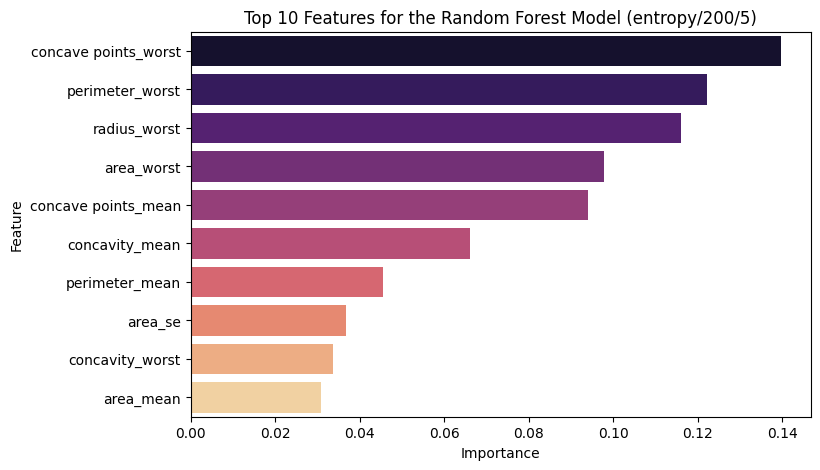

In [170]:
top_random_forest_classifier = RandomForestClassifier(criterion='entropy',
                                            n_estimators=200,
                                            min_samples_split=5,
                                            random_state=0)

top_random_forest_classifier.fit(X_train, y_train)

feature_importances_cleaned = top_random_forest_classifier.feature_importances_

# Create a DataFrame for feature importances
features_df_cleaned = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_cleaned
})

# Sort by importance and select the top 10
top_10_features_cleaned = features_df_cleaned.sort_values(by='Importance', ascending=False).head(10)

# Create a bar plot for the top 10 features
plt.figure(figsize=(8, 5))
sns.barplot(data=top_10_features_cleaned, x='Importance', y='Feature', palette='magma')
plt.title('Top 10 Features for the Random Forest Model (entropy/200/5)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Question 8

In [180]:
data.iloc[100:102].T

,100,101
id,862717,862722
diagnosis,M,B
radius_mean,13.61,6.981
texture_mean,24.98,13.43
perimeter_mean,88.05,43.79
area_mean,582.7,143.5
smoothness_mean,0.09488,0.117
compactness_mean,0.08511,0.07568
concavity_mean,0.08625,0.0
concave points_mean,0.04489,0.0


**concave points_worst** is the top feature in importance and we can guess that having a number more than 0 indicates Malignant as the result.
Moreover, **perimeter, area, radius wrong** all have larger values in the case of Malignant so we can also come to the conclusion that the larger amount in these features indicates Malignant.

The same follows for the rest of the top 10 important features